In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/drug200.csv")
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [3]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [5]:
df.shape

(200, 6)

<Axes: >

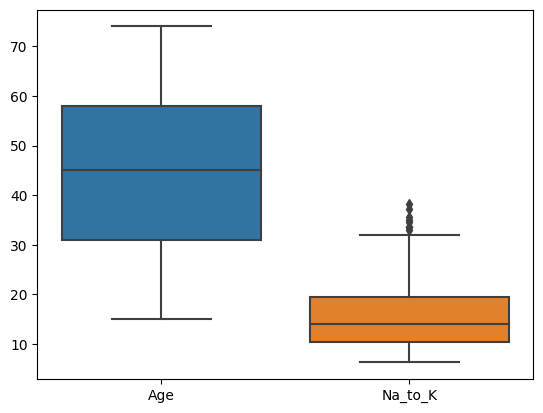

In [6]:
sns.boxplot(df)

In [7]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [8]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [9]:
df.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
## Outlier

In [11]:
q1 = df["Na_to_K"].quantile(.25)
q3 = df["Na_to_K"].quantile(.75)

IQR = q3 - q1
IQR

8.9345

In [12]:
up_lim = q3 + 1.5 *IQR
df2 = df[df["Na_to_K"] < up_lim]

In [13]:
df2.shape

(192, 6)

<Axes: >

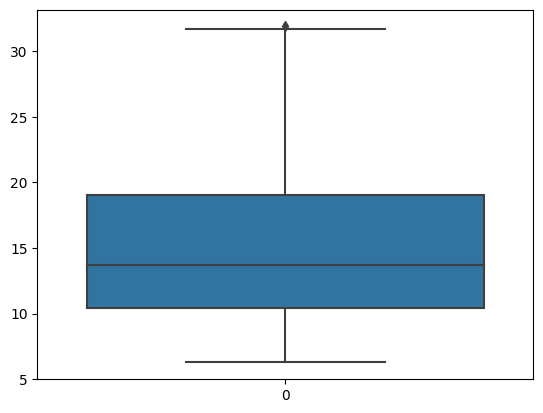

In [14]:
sns.boxplot(df2["Na_to_K"])

<ipython-input-15-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

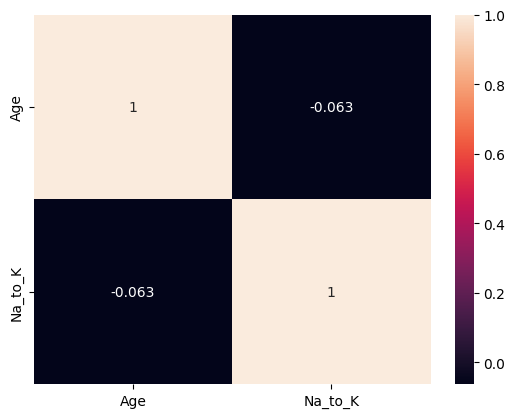

In [15]:
sns.heatmap(df.corr(), annot = True)

<ipython-input-16-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

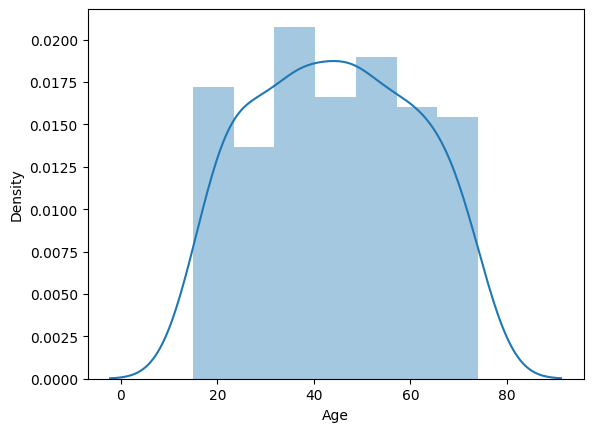

In [16]:
sns.distplot(df['Age'])

In [17]:
x = df2.drop(["Drug"], axis=1)
y = df2["Drug"]

In [18]:
dy = pd.get_dummies(y)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,dy,test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
bp_le = LabelEncoder()
sx_le = LabelEncoder()
ch_le = LabelEncoder()

In [22]:
x_train['BP'] = bp_le.fit_transform(x_train['BP'])
x_train['BP']

83     0
112    1
167    2
36     0
140    0
      ..
109    2
14     2
93     1
185    2
105    1
Name: BP, Length: 153, dtype: int64

In [23]:
bp_le.classes_

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [24]:
x_train['Sex'] = sx_le.fit_transform(x_train['Sex'])
x_train['Sex']

83     0
112    1
167    0
36     1
140    1
      ..
109    1
14     0
93     0
185    0
105    1
Name: Sex, Length: 153, dtype: int64

In [25]:
x_train['Cholesterol'] = ch_le.fit_transform(x_train['Cholesterol'])
x_train['Cholesterol']

83     1
112    1
167    0
36     1
140    1
      ..
109    0
14     0
93     1
185    1
105    1
Name: Cholesterol, Length: 153, dtype: int64

In [26]:
ch_le.classes_

array(['HIGH', 'NORMAL'], dtype=object)

In [27]:
y_train

,DrugY,drugA,drugB,drugC,drugX
83,0,1,0,0,0
112,0,0,0,0,1
167,0,0,0,0,1
36,0,1,0,0,0
140,0,1,0,0,0
...,...,...,...,...,...
109,1,0,0,0,0
14,0,0,0,0,1
93,1,0,0,0,0
185,1,0,0,0,0


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 32)                192       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,555
Trainable params: 3,555
Non-trainabl

In [32]:
x_test['Cholesterol'] = ch_le.transform(x_test['Cholesterol'])
x_test['BP'] = bp_le.transform(x_test['BP'])
x_test['Sex'] = sx_le.transform(x_test['Sex'])

In [33]:
model.fit(x_train,y_train.values,epochs=150,batch_size=5,validation_data=(x_test,y_test.values))

Epoch 1/150
31/31 [==============================] - 4s 29ms/step - loss: 1.5132 - accuracy: 0.4379 - val_loss: 1.4755 - val_accuracy: 0.4103
Epoch 2/150
31/31 [==============================] - 0s 11ms/step - loss: 1.2906 - accuracy: 0.5425 - val_loss: 1.5088 - val_accuracy: 0.3846
Epoch 3/150
31/31 [==============================] - 0s 6ms/step - loss: 1.2197 - accuracy: 0.5425 - val_loss: 1.3992 - val_accuracy: 0.3846
Epoch 4/150
31/31 [==============================] - 0s 7ms/step - loss: 1.1361 - accuracy: 0.5621 - val_loss: 1.2875 - val_accuracy: 0.4359
Epoch 5/150
31/31 [==============================] - 0s 9ms/step - loss: 1.1091 - accuracy: 0.5621 - val_loss: 1.2702 - val_accuracy: 0.4359
Epoch 6/150
31/31 [==============================] - 0s 6ms/step - loss: 1.0608 - accuracy: 0.5621 - val_loss: 1.2059 - val_accuracy: 0.4359
Epoch 7/150
31/31 [==============================] - 0s 8ms/step - loss: 1.0641 - accuracy: 0.5948 - val_loss: 1.2188 - val_accuracy: 0.4359
Epoch 8/150

In [34]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


In [35]:
drug_cols = y_train.columns
drug_cols

Index(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype='object')

In [36]:
y_pred.shape

(39, 5)

In [37]:
def convert_output(x):
  m = x.shape[0]
  for i in range(m):
    z = np.zeros(5)
    ind = np.argmax(x[i])
    z[ind] = 1
    x[i] = z
  return x.astype(int)

In [38]:
pred_out = pd.DataFrame(convert_output(y_pred), columns=drug_cols)

In [39]:
y_test.reset_index(drop=True, inplace=True)
y_test

,DrugY,drugA,drugB,drugC,drugX
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,0,1,0
8,0,0,0,0,1
9,1,0,0,0,0


In [40]:
pred_out.compare(y_test, keep_equal=True)

drugA       drugB      
    self other  self other
20     0     1     1     0